# Spotify Data Analysis

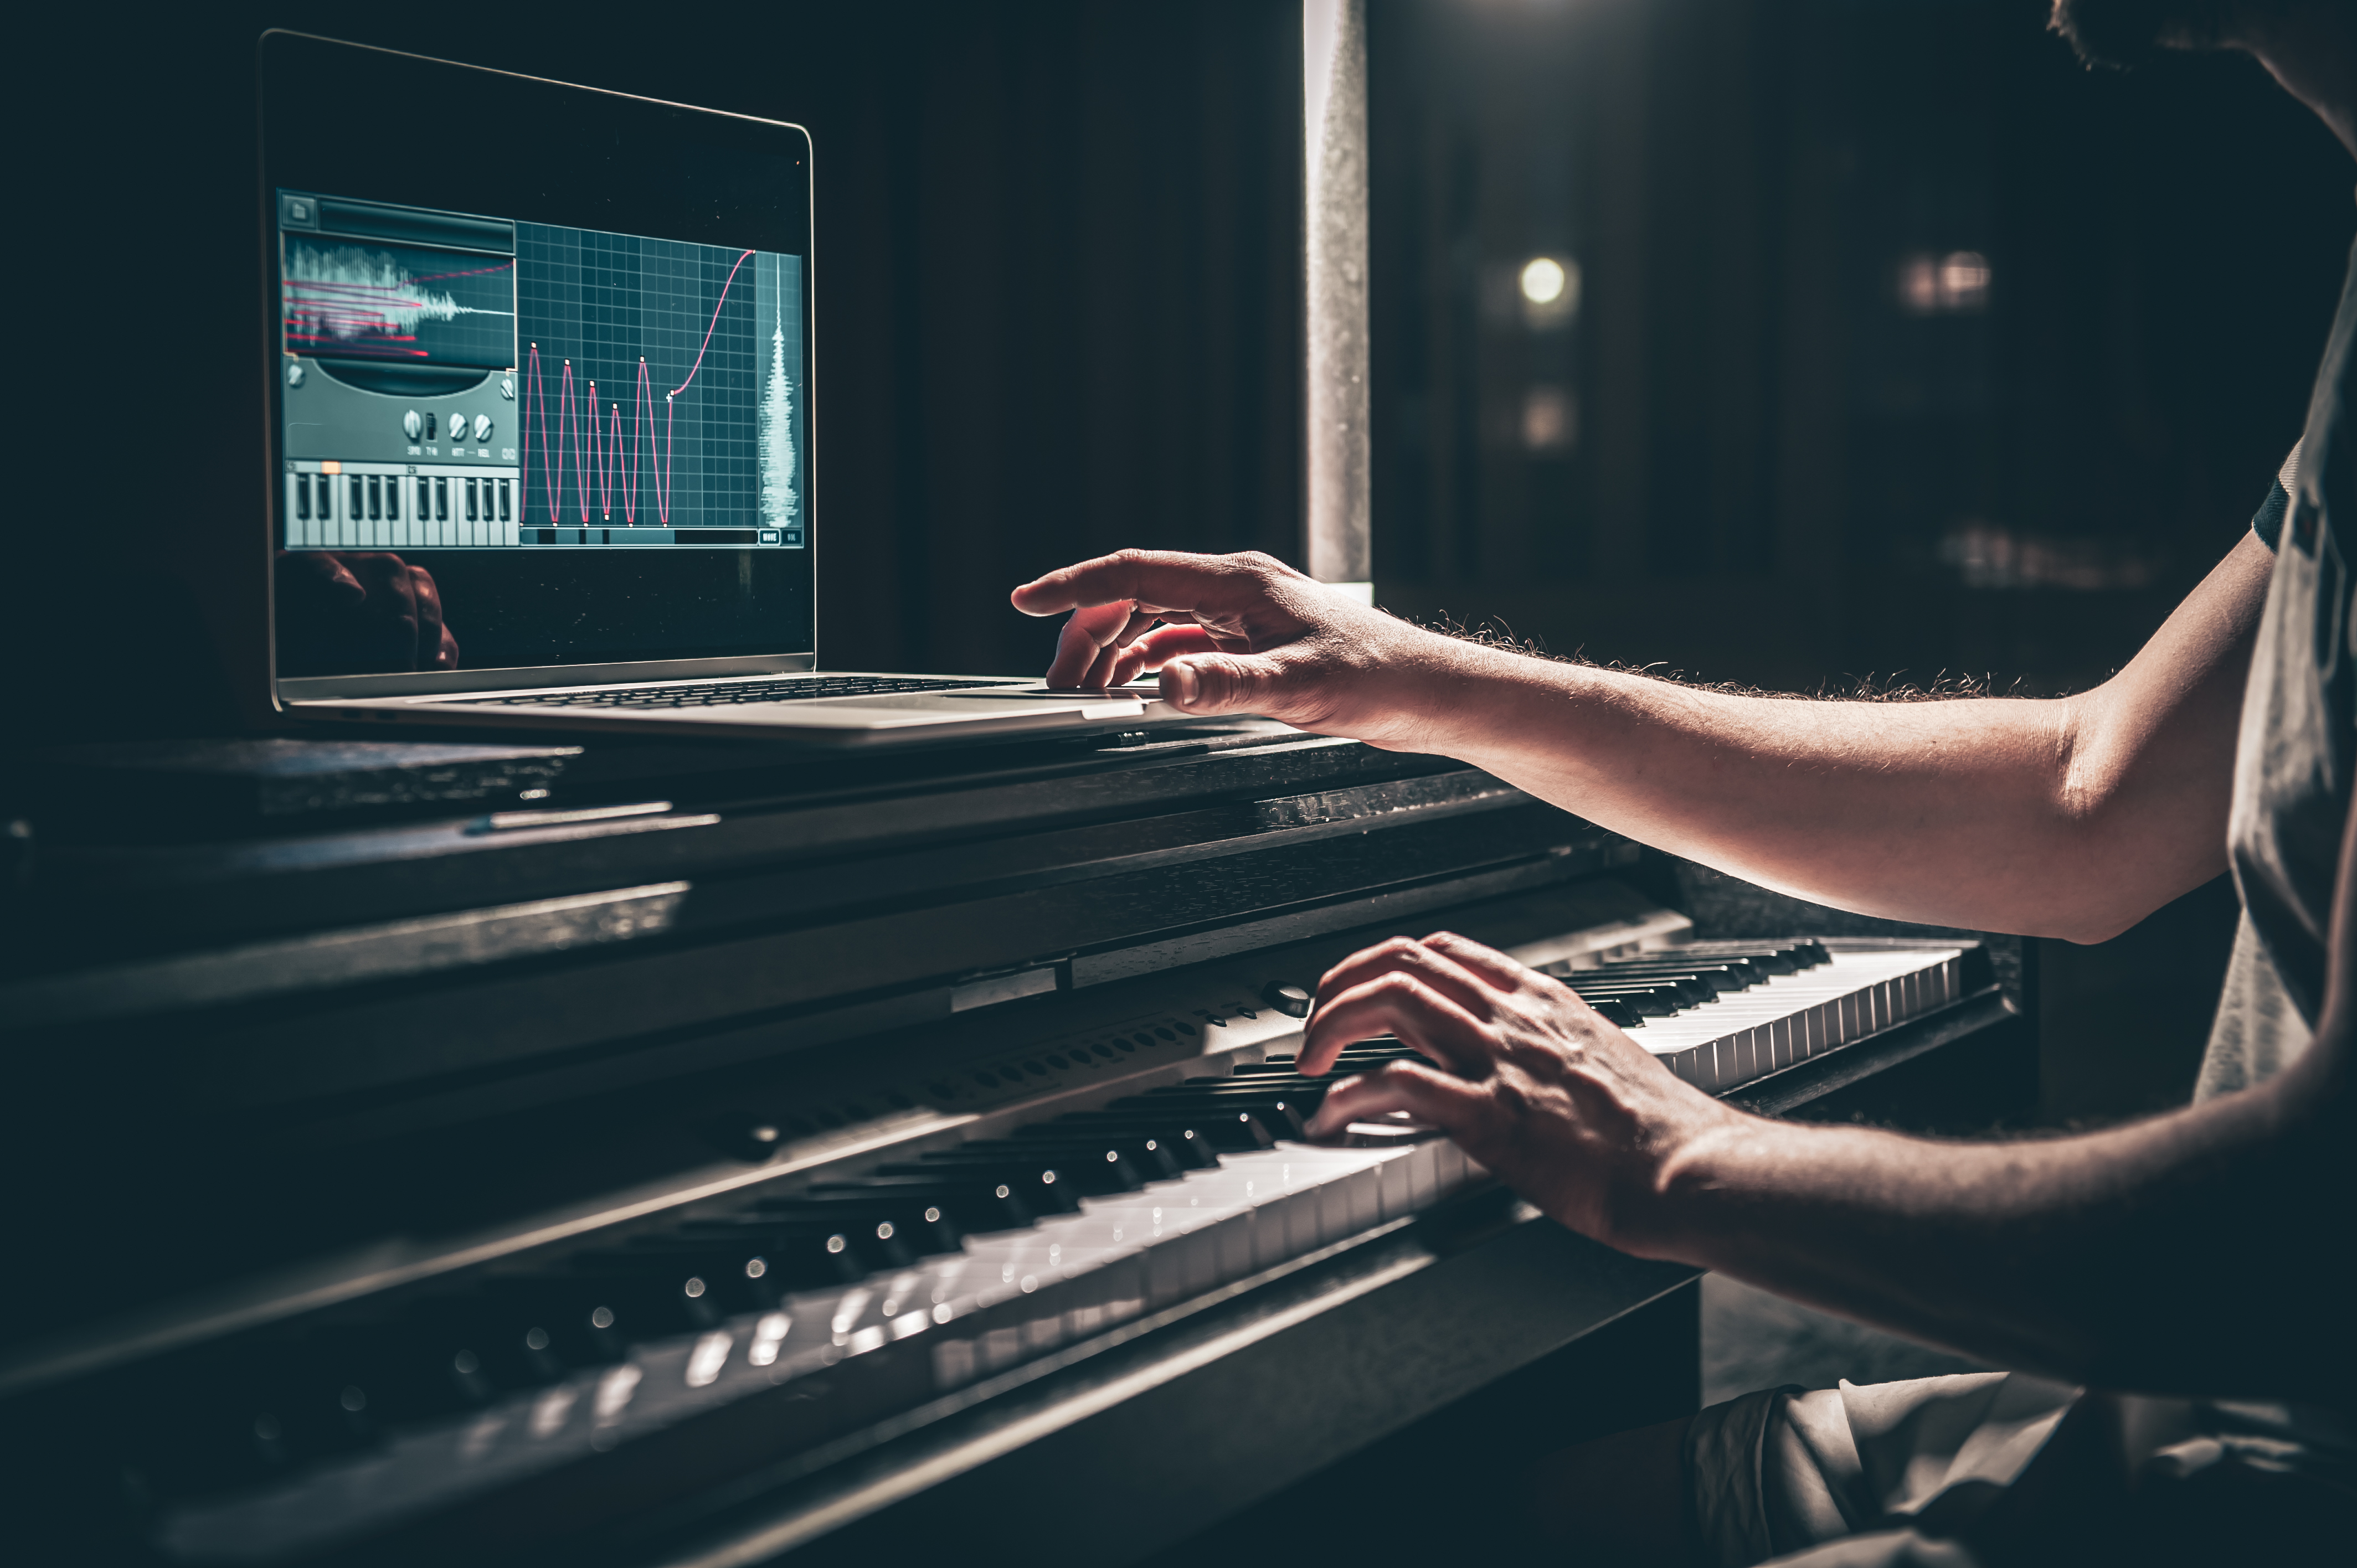

This dataset offers a wealth of opportunities for exploring trends, patterns, and correlations within the Spotify music ecosystem. Analyzing this data can unveil insights into the characteristics that drive track popularity, genre distinctions, and the diverse landscape of musical expressions on the Spotify platform.

### Columns

* **Genre:** A genre is a specific type of music.

* **Artist Name:** Name of the artist of the song.

* **Track Name:** Title of the song.

* **Track ID**: The Spotify ID for the track.

* **popularity:** How much is a tarck popular.

* **Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **Danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **Duration ms:** The duration of the track in milliseconds.

* **Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **Instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **Key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* **Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* **Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

* **Mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.

* **Speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* **Tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* **Time Signature:** A time signature in music is represented as a fraction. The top number indicates the number of beats per measure, and the bottom number designates the note value receiving one beat. For example, in 4/4, there are four beats per measure, and the quarter note gets one beat.

* **Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

---

### Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [4]:
df = pd.read_csv('SpotifyFeatures.csv')

## Explore the Data

In [5]:
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

### Information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [7]:
df.describe()

popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

## Data Cleaning

### Finding null values

In [8]:
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

genre        artist_name track_name                track_id  \
208285  World  Elevation Worship        NaN  7BGQCe62A58Q5ZgpQFX93t   

        popularity  acousticness  danceability  duration_ms  energy  \
208285          44         0.019         0.287       350027   0.446   

        instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
208285               0.0   F       0.1    -7.214  Major       0.0317  138.727   

       time_signature  valence  
208285            4/4   0.0387

### Drop null values

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

### Finding duplicated values

In [12]:
df.duplicated().value_counts()

False    232724
Name: count, dtype: int64

In [13]:
df.duplicated(subset=['track_id']).value_counts()

False    176773
True      55951
Name: count, dtype: int64

In [14]:
df = df.drop_duplicates(subset=['track_id'])
df.duplicated(subset=['track_id']).value_counts()

False    176773
Name: count, dtype: int64

## Data Analysis

In [15]:
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

### Longest songs in Spotify

In [16]:
df_tm = df.copy()
df_tm['duration_s'] = df['duration_ms']/1000
df_tm['duration_minute'] = df['duration_ms']/60000
# df = df.drop(columns='duration_ms')

In [17]:
longest_track = df_tm.sort_values(by='duration_s', ascending=False)
longest_track[['track_name', 'duration_minute']].head(10).reset_index(drop=True)

track_name  duration_minute
0  Episodio 15 (Lady Orinoco, Políticas De Youtub...        92.548617
1                                          6 : 00 Am        91.466667
2                                Lost Lands 2017 Mix        80.510100
3       Episodio 14 (Machismo, Juanga, Bebé a Bordo)        80.509733
4  Nature Sounds for Sleep: Crackling Log Fire wi...        80.066917
5                       Three Radio Men and a Steek!        79.862083
6                    Lo Que No Le Dirías a Tu Pareja        77.699850
7                           Late Night Tales: Bonobo        74.966567
8     Late Night Tales: Jon Hopkins - Continuous Mix        72.292150
9                              Series De La Infancia        71.722767

### Shortest songs in Spotify

In [18]:
longest_track = df_tm.sort_values(by='duration_s', ascending=True)
longest_track[['track_name', 'duration_s']].head(10).reset_index(drop=True)

track_name  duration_s
0                                         Pat-a-cake      15.387
1  Rinaldo, HWV 7a, Act I (Ed. G. Sechi): Questi ...      15.509
2  St. John Passion, BWV 245, Pt. 2: No. 25c, Pil...      16.316
3                             S McGregor (interlude)      16.640
4  St. John Passion, BWV 245, Pt. 2: No. 21a, Und...      16.748
5                    Narration / Spoken Interlude 17      16.760
6                              Who's Got a Birthday?      17.000
7       "Now I'll Take a Little Break Right Here..."      17.213
8  Scotland is Free! [Braveheart - Original Sound...      17.627
9                                    This Little Pig      17.840

### Most popular songs

In [19]:
most_popular_songs = df.sort_values(by='popularity', ascending=False)
most_popular_songs[['track_name', 'popularity']].head(10).reset_index(drop=True)

track_name  popularity
0                                        7 rings         100
1       break up with your girlfriend, i'm bored          99
2                                           Wow.          99
3                                      Con Calma          98
4                                     Without Me          97
5         Dancing With A Stranger (with Normani)          97
6  Sunflower - Spider-Man: Into the Spider-Verse          97
7                               Sweet but Psycho          97
8                                        Happier          97
9                                  Calma - Remix          97

### Correlation between columns

In [20]:
df = pd.read_csv('SpotifyFeatures.csv')

In [21]:
df_corr = df.drop(columns=['track_name', 'artist_name', 'genre', 'track_id', 'key', 'mode', 'time_signature'])

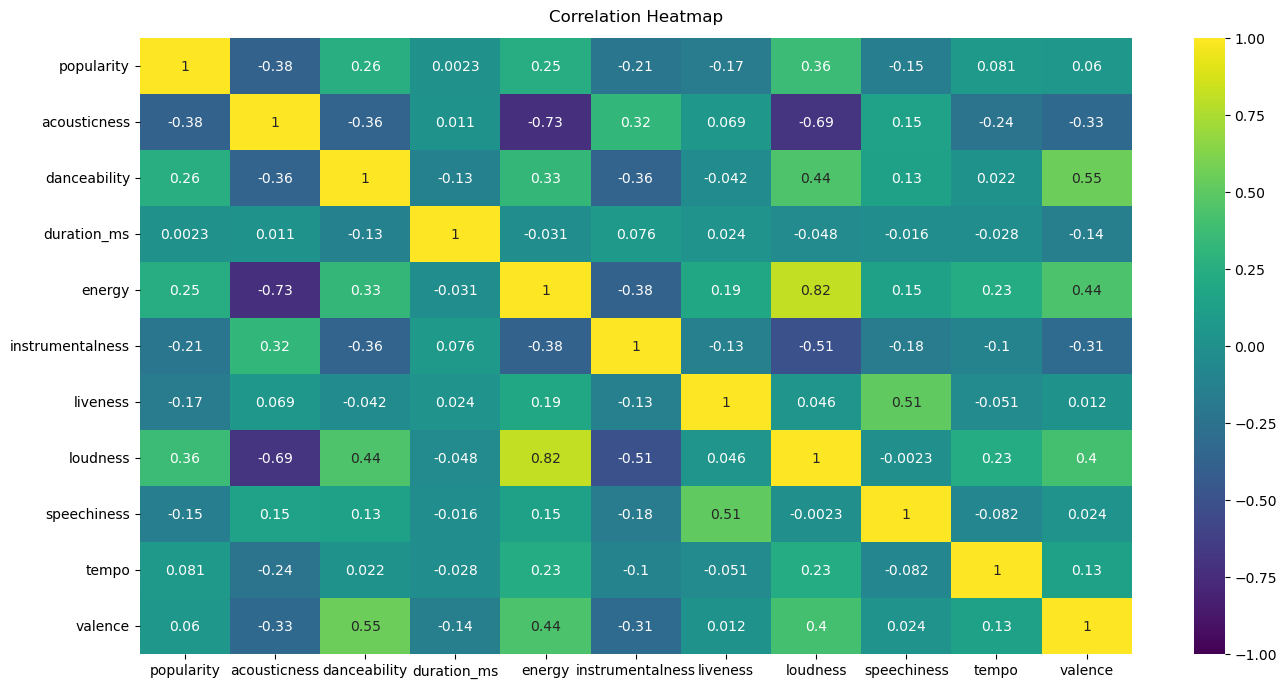

In [22]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df_corr.corr(), cmap="viridis", vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
# rocket
# viridis
# crest
# mako

### correlation between loudness & energy

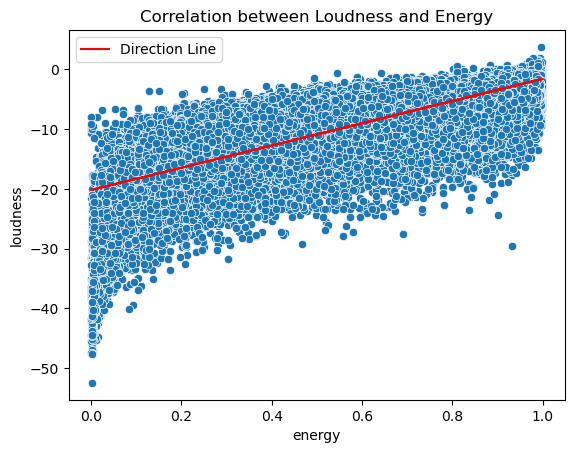

In [23]:
sns.scatterplot(data=df, x="energy", y="loudness")
slope, intercept = np.polyfit(df['energy'], df['loudness'], 1)
plt.plot(df['energy'], slope * df['energy'] + intercept, color='red', linestyle='-', linewidth=1.5, label='Direction Line')
plt.title('Correlation between Loudness and Energy')
plt.legend()
plt.show()

## Music Genres 

In [24]:
# df = pd.read_csv('SpotifyFeatures.csv')

### Which genre has the most tracks?

In [25]:
df['count'] = 1

In [26]:
grouped_by_genre_count = df.groupby('genre').count()
grouped_by_genre_count_sorted = grouped_by_genre_count.sort_values(by='count', ascending=False).reset_index()
grouped_by_genre_count_sorted[['genre','count']].head()

genre  count
0      Comedy   9681
1  Soundtrack   9646
2       Indie   9543
3        Jazz   9441
4         Pop   9386

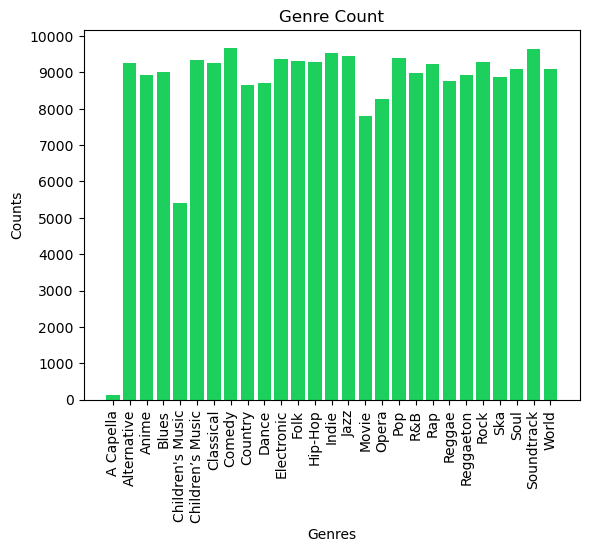

In [27]:
x = grouped_by_genre_count.reset_index()
y = grouped_by_genre_count.reset_index()
plt.bar(x['genre'], y['count'], color='#1DD05D', width=0.8)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 11000, 1000), )
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.title('Genre Count')
plt.show()

In [28]:
grouped_by_genre_sum = df.groupby('genre').sum()

In [29]:
def normalize_list(input_list, new_min, new_max):
    # Find the minimum and maximum values in the input list
    current_min = min(input_list)
    current_max = max(input_list)
    # Normalize each value in the input list to the new range
    normalized_list = [int((value - current_min) / (current_max - current_min) * (new_max - new_min) + new_min) for value in input_list]
    return normalized_list

In [30]:
def get_col_grouped_by_genre_sum(column): 
    
   # get the real column data for each genre. sum / count = real column
   grouped_by_genre_sum[column] = grouped_by_genre_sum[column]/grouped_by_genre_count[column]
   
   # make a range between 0 - 100 to know which genres are most populare
   grouped_by_genre_sum[column] = normalize_list(grouped_by_genre_sum[column], 0, 100)
   
   # sort by the column     
   grouped_by_genre_sum_sorted = grouped_by_genre_sum.sort_values(by=column, ascending=False).reset_index() 
   return grouped_by_genre_sum_sorted

### What is the most popular music genre?

In [31]:
grouped_by_genre_popular_col = get_col_grouped_by_genre_sum('popularity')
grouped_by_genre_popular_col[['genre','popularity']].head()

genre  popularity
0      Pop         100
1      Rap          90
2     Rock          88
3  Hip-Hop          86
4    Dance          85

In [32]:

# # get the real popularity for each genre. sum / count = popularity
# grouped_by_genre_sum['popularity'] = grouped_by_genre_sum['popularity']/grouped_by_genre_count['popularity']
# # make a range between 0 - 100 to know which genres are most populare
# grouped_by_genre_sum['popularity'] = normalize_list(grouped_by_genre_sum['popularity'], 0, 100)
# grouped_by_genre_sum_sorted = grouped_by_genre_sum.sort_values(by='popularity', ascending=False).reset_index()
# grouped_by_genre_sum_sorted[['genre','popularity']].head()

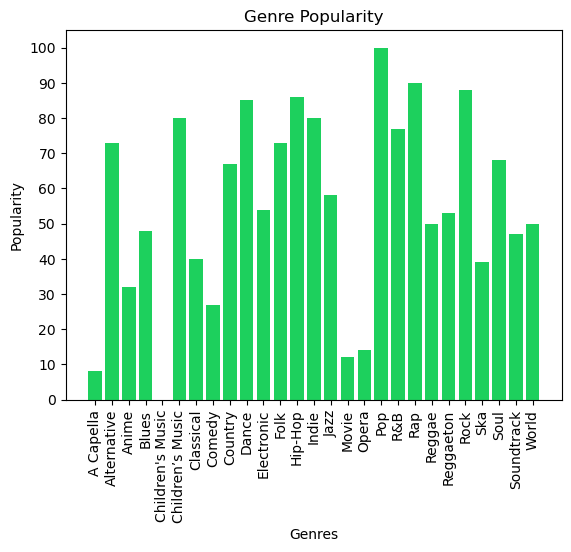

In [33]:
x = grouped_by_genre_sum.reset_index()
y = grouped_by_genre_sum.reset_index()
plt.bar(x['genre'], y['popularity'], color='#1DD05D', width=0.8)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 110, 10))
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.title('Genre Popularity')
plt.show()

### What is the most energizing genre of music?

In [34]:
grouped_by_genre_energy_col = get_col_grouped_by_genre_sum('energy')
grouped_by_genre_energy_col[['genre','energy']].head()

genre  energy
0               Ska     100
1         Reggaeton      89
2        Electronic      88
3  Children’s Music      83
4       Alternative      83

### What is the most liveness genre of music?

In [35]:
grouped_by_genre_liveness_col = get_col_grouped_by_genre_sum('liveness')
grouped_by_genre_liveness_col[['genre','liveness']].head()

genre  liveness
0  Comedy       100
1     Ska        18
2   Blues        16
3   World        15
4   Movie        15

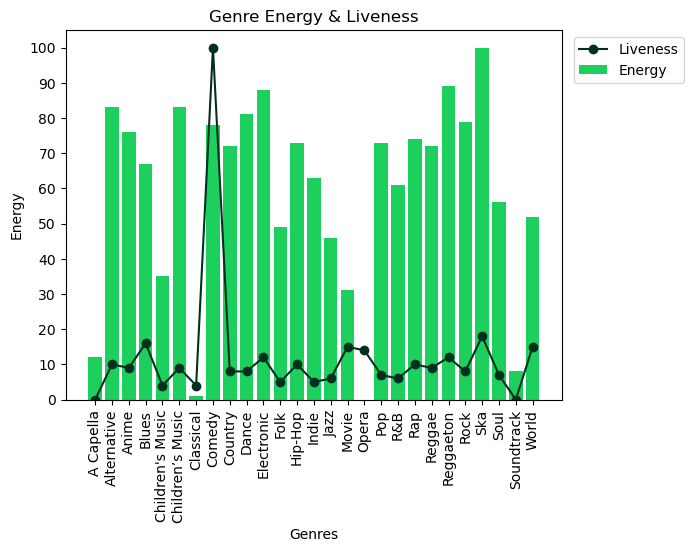

In [36]:
# set the bar chart for energy
x = grouped_by_genre_sum.reset_index()
y = grouped_by_genre_sum.reset_index()

# bar chart
plt.bar(x['genre'], y['energy'], label='Energy', color='#1DD05D', width=0.8)

# line chart
plt.plot(x['genre'], y['liveness'], label='Liveness', color='#023020', marker='o')

plt.xticks(rotation=90)
plt.yticks(np.arange(0, 110, 10))
plt.xlabel('Genres')
plt.ylabel('Energy')
plt.title('Genre Energy & Liveness')
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')

plt.show()

In [37]:
grouped_by_genre_danceability_col = get_col_grouped_by_genre_sum('danceability')
grouped_by_genre_danceability_col[['genre','danceability']].head()

genre  danceability
0         Reggaeton           100
1           Hip-Hop            97
2            Reggae            93
3               Rap            92
4  Children's Music            92

In [38]:
grouped_by_genre_valence_col = get_col_grouped_by_genre_sum('valence')
grouped_by_genre_valence_col[['genre','valence']].head()

genre  valence
0            Reggae      100
1  Children's Music       99
2         Reggaeton       96
3               Ska       95
4             Blues       82

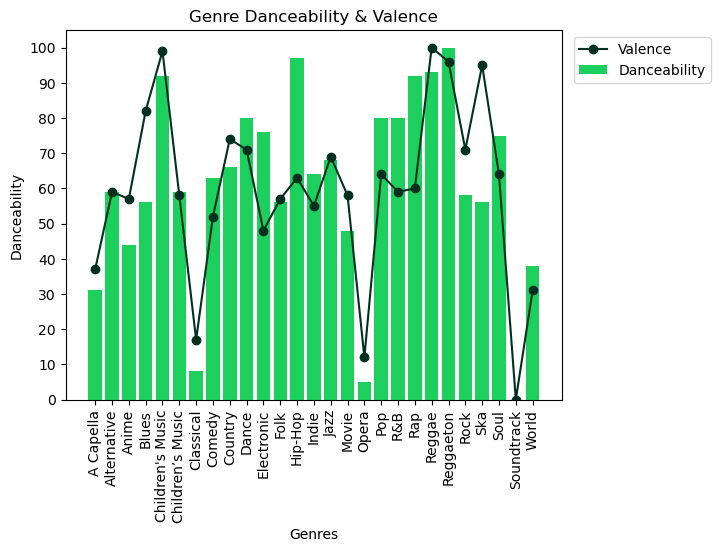

In [39]:
# set the bar chart for energy
x = grouped_by_genre_sum.reset_index()
y = grouped_by_genre_sum.reset_index()

# bar chart
plt.bar(x['genre'], y['danceability'], label='Danceability', color='#1DD05D', width=0.8)

# line chart
plt.plot(x['genre'], y['valence'], label='Valence', color='#023020', marker='o')

plt.xticks(rotation=90)
plt.yticks(np.arange(0, 110, 10))
plt.xlabel('Genres')
plt.ylabel('Danceability')
plt.title('Genre Danceability & Valence')
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')

plt.show()

## Artist

### Artists who release too much music

In [40]:
grouped_by_artist_name_count = df.groupby('artist_name').count()
grouped_by_artist_name_count_sorted = grouped_by_artist_name_count.sort_values(by='count', ascending=False).reset_index()
grouped_by_artist_name_count_sorted[['artist_name','count']].head(10)

artist_name  count
0           Giuseppe Verdi   1394
1          Giacomo Puccini   1137
2   Kimbo Children's Music    971
3            Nobuo Uematsu    825
4           Richard Wagner    804
5  Wolfgang Amadeus Mozart    800
6             Randy Newman    757
7            Georges Bizet    701
8              Juice Music    684
9    Johann Sebastian Bach    632

In [41]:
# show count of genre for each artist name

# from collections import Counter 
# result = df.groupby('artist_name')['genre'].apply(Counter).reset_index()
# # result['genre_counts'] = result['genre'].apply(Counter)
# result.head(20)

### Who has most pupular songs?

In [42]:
grouped_by_artist_name_sum = df.groupby('artist_name').sum()

grouped_by_artist_name_sum['popularity'] = grouped_by_artist_name_sum['popularity']/grouped_by_artist_name_count['popularity']
grouped_by_artist_name_sum['popularity'] = normalize_list(grouped_by_artist_name_sum['popularity'], 0, 100)  
grouped_by_artist_name_sum_sorted = grouped_by_artist_name_sum.sort_values(by='popularity', ascending=False).reset_index() 
grouped_by_artist_name_sum_sorted[['artist_name', 'popularity']].head(10)

artist_name  popularity
0            Pedro Capó         100
1        Mario Bautista          97
2           Mau y Ricky          95
3           Paloma Mami          94
4  Kris Kross Amsterdam          94
5                 Ninho          94
6         Martin Garrix          94
7           Sofia Reyes          93
8       Heuss L'enfoiré          93
9                   NSG          93

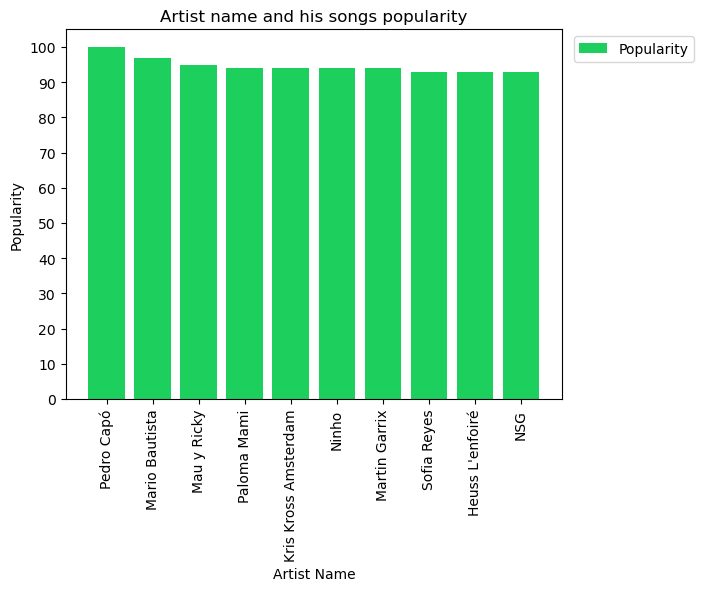

In [45]:
x = grouped_by_artist_name_sum_sorted.reset_index()
y = grouped_by_artist_name_sum_sorted.reset_index()

# bar chart
plt.bar(x['artist_name'].head(10), y['popularity'].head(10), label='Popularity', color='#1DD05D', width=0.8)

# line chart
# plt.plot(x['genre'], y['valence'], label='Valence', color='#023020', marker='o')

plt.xticks(rotation=90)
plt.yticks(np.arange(0, 110, 10))
plt.xlabel('Artist Name')
plt.ylabel('Popularity')
plt.title('Artist name and his songs popularity')
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')

plt.show()